# FLIGHT TICKET PRICE PREDICTION

In [46]:
from IPython import display

In [47]:
from IPython.display import Image

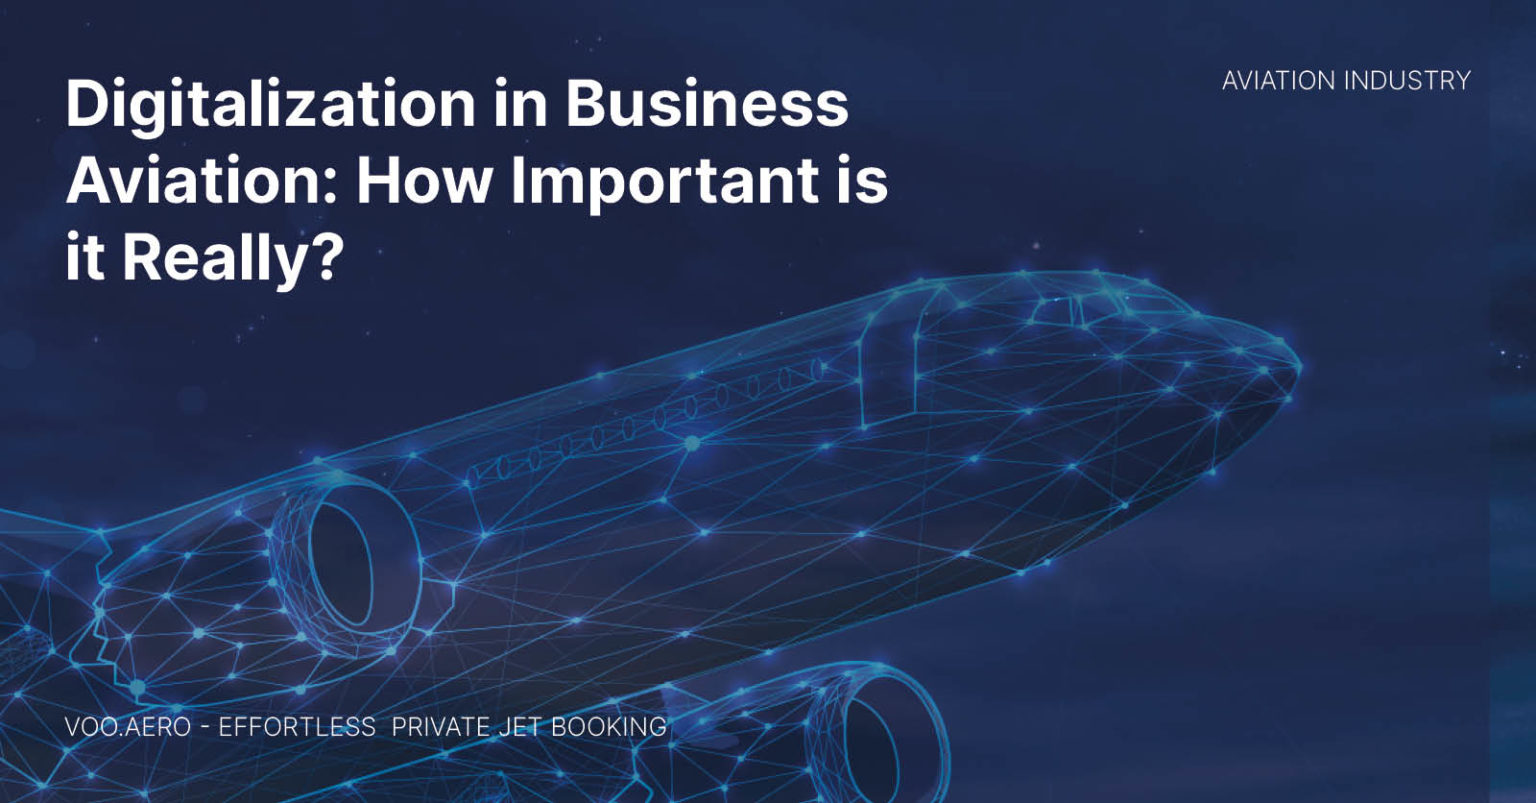

In [48]:
Image(filename='C:\\Users\\Admin\\Pictures\\VOO_BLOGheader_DigitalizationBizAv_WEB-1536x803.jpg')

### 1. Business Understanding
### 2. Data Understanding
### 3. Data Cleaning & Preprocessing
### 4. EDA (Exploratory Data Analysis)
### 5. Model Selection
### 6. Model Evaluation & Accuracy
### 7. Model Deployment
### 8. Reporting & Dashboarding

# BUSINESS UNDERSTANDING

The objective of the flight ticket price prediction project is to **create a predictive model that accurately forecasts flight ticket price**.<br>
1. **For Consumers,** are always looking for ways to save money on flight tickets. The objectives here is to help them identify the best times to Purchase tickets by predicting Price trends.
2. **For Airline,** The Predictive model into the airline's Revenue Management systems to aid in dynamic Pricing. Use the Model to forecast demand and adjust ticket price in real-time to maximize revenue.
3. **For Travel Agencies,** They provide clients with accurate prediction on the best times to book flights to save money. Enhance travel packages and offer based on the model's Predictions to attract more clients. 

# DATA UNDERSTANDING

In this Datasets, There are **300153 Rows** and **11 Columns,** They are
1. **Airline :-** Vistara, Air India, Indigo, Go First, Air Asia, SpiceJet
2. **Flight :-** There are Many flight Under the Airline Company
3. **Source City :-** Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai
4. **Departure Time :-** Early Morining, Morning, Afternoon, Evening, Night, Late Night
5. **Stops :-** Non-Stop, One Stop and Two or More
6. **Arrival Time :-** The Time of this Column same as Departure Time of Flight
7. **Destination City :-** The Flight run Inbetween the Source City and Viceversa
8. **Class :-** Business and Economy
9. **Duration :-** How Much Time Take to Reach Destination City From Source City
10. **Days Left :-** Days Left for Flight
11. **Price :-** Flight Ticket Price Per Seat

### Import Python Library

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Datasets

In [57]:
flight = pd.read_csv('https://raw.githubusercontent.com/Deepak6438/Data-Analysis/main/Flight%20Ticket%20Price%20Prediction/Flight%20Datasets.csv',index_col=0)

In [58]:
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [59]:
flight.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [176]:
flight.shape

(300153, 11)

In [178]:
flight.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

### Descriptive Statistics Of Data

In [180]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [182]:
flight.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# DATA CLEANING & PREPROCESSING

In [184]:
# There is not any Missing value in this Datasets

flight.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### flight_2 New Data Frame

In [186]:
flight_2 = flight.copy()

In [188]:
flight_2.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [190]:
flight_2.insert(loc=7,column='source to destination',value=flight_2['source_city'] + '->' + flight_2['destination_city'])

In [192]:
flight_2.insert(loc=6,column='departure to arrival',value=flight_2['departure_time'] + '->' + flight_2['arrival_time'])

In [194]:
flight_2.head()

,airline,flight,source_city,departure_time,stops,arrival_time,departure to arrival,destination_city,source to destination,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Evening->Night,Mumbai,Delhi->Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Early_Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Early_Morning->Early_Morning,Mumbai,Delhi->Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Morning->Afternoon,Mumbai,Delhi->Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.33,1,5955


### Outlier Detection By Using Box Plot

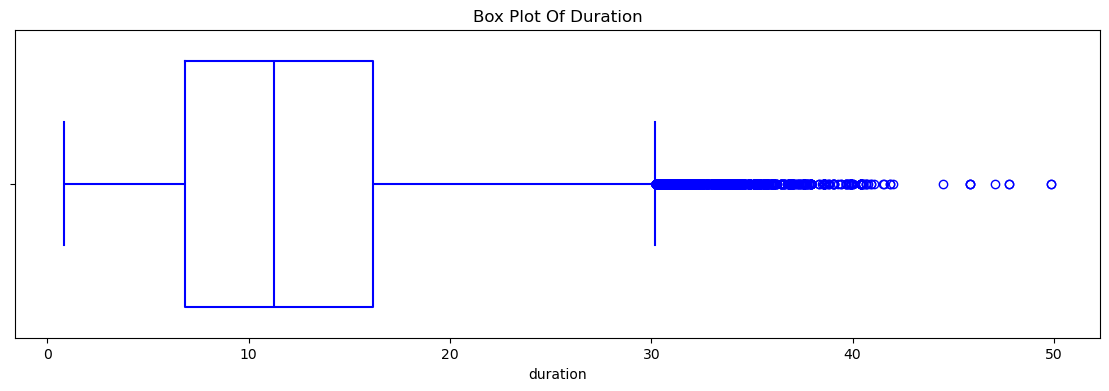

In [196]:
plt.figure(figsize=(14,4))
sns.boxplot(data=flight_2,x=flight_2['duration'],color='blue',fill=False)
plt.title('Box Plot Of Duration')
plt.show()

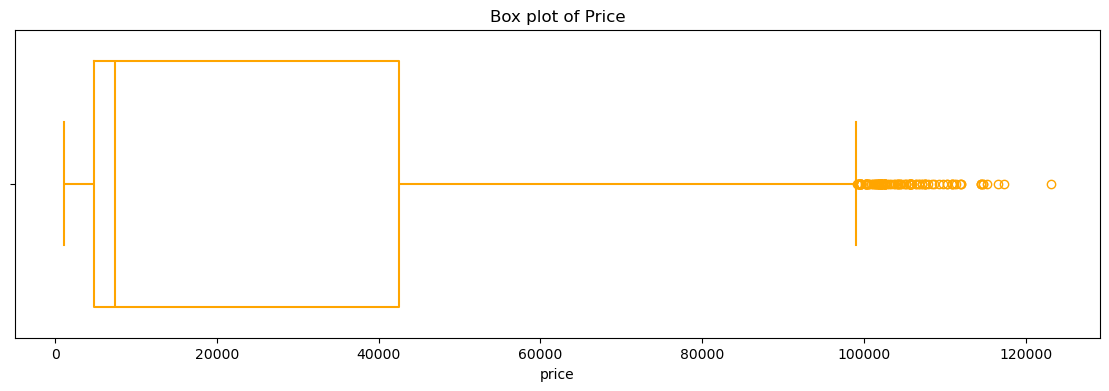

In [198]:
plt.figure(figsize=(14,4))
sns.boxplot(data=flight_2,x=flight_2['price'],color='orange',fill=False)
plt.title('Box plot of Price')
plt.show()

### Outlier Detection By Using IQR Method

In [202]:
Q1 = flight_2['price'].quantile(0.25)
Q1

4783.0

In [204]:
Q3 = flight_2['price'].quantile(0.75)
Q3

42521.0

In [206]:
IQR = Q3 - Q1
IQR

37738.0

In [208]:
lower_band = Q1-1.5*IQR
lower_band

-51824.0

In [210]:
upper_band = Q3+1.5*IQR
upper_band

99128.0

### Outlier New DataFrame

In [212]:
# The Outlier Datapoint are Greather than 99128 or in the range between of (-51824 and 99128)

outlier = flight_2[(flight_2['price'] < -51824) | (flight_2['price'] > 99128)]

In [214]:
outlier.head()

,airline,flight,source_city,departure_time,stops,arrival_time,departure to arrival,destination_city,source to destination,class,duration,days_left,price
215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Evening->Evening,Kolkata,Delhi->Kolkata,Business,21.08,1,114434
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Evening->Evening,Kolkata,Delhi->Kolkata,Business,21.08,1,116562
216025,Vistara,UK-817,Delhi,Evening,two_or_more,Morning,Evening->Morning,Kolkata,Delhi->Kolkata,Business,17.58,4,100395
216094,Vistara,UK-995,Delhi,Morning,one,Evening,Morning->Evening,Kolkata,Delhi->Kolkata,Business,6.50,5,99129
216095,Vistara,UK-963,Delhi,Morning,one,Evening,Morning->Evening,Kolkata,Delhi->Kolkata,Business,8.00,5,101369


In [218]:
# There are 123 Outlier Data Point
outlier.shape

(123, 13)

### We Cant't Drop The Outlier, Beacause of this reason (Loss of Information):-
This Outlier data point provide me important information about the variability in the Data and Indicate areas that need further investigation

# EDA (Exploratory Data Analysis)

In [221]:
import warnings
warnings.filterwarnings('ignore')

### Categorical Data Analysis

In [223]:
sns.set_style('dark')

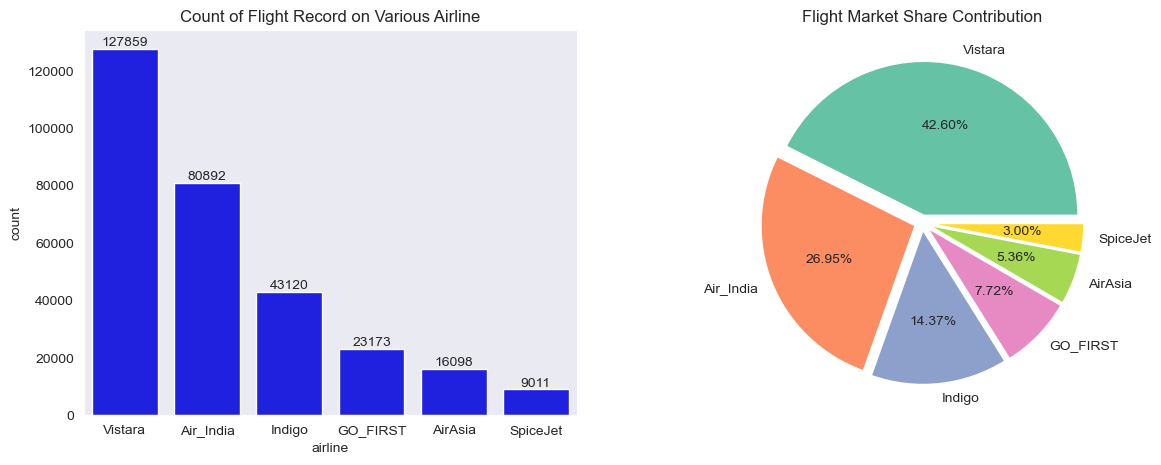

In [225]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=flight_2,x=flight_2['airline'],order=flight_2['airline'].value_counts().index,color='blue')
for i,airline in enumerate(flight_2['airline'].value_counts()):
    plt.text(i,airline,s=airline,ha='center',va='bottom')

plt.title('Count of Flight Record on Various Airline')
plt.subplot(1,2,2)
plt.pie(x=flight_2['airline'].value_counts(),explode=len(flight_2['airline'].value_counts())*[0.05],autopct='%1.2f%%',labels=flight_2['airline'].value_counts().index,colors=sns.color_palette('Set2'))
plt.title('Flight Market Share Contribution')
plt.show()

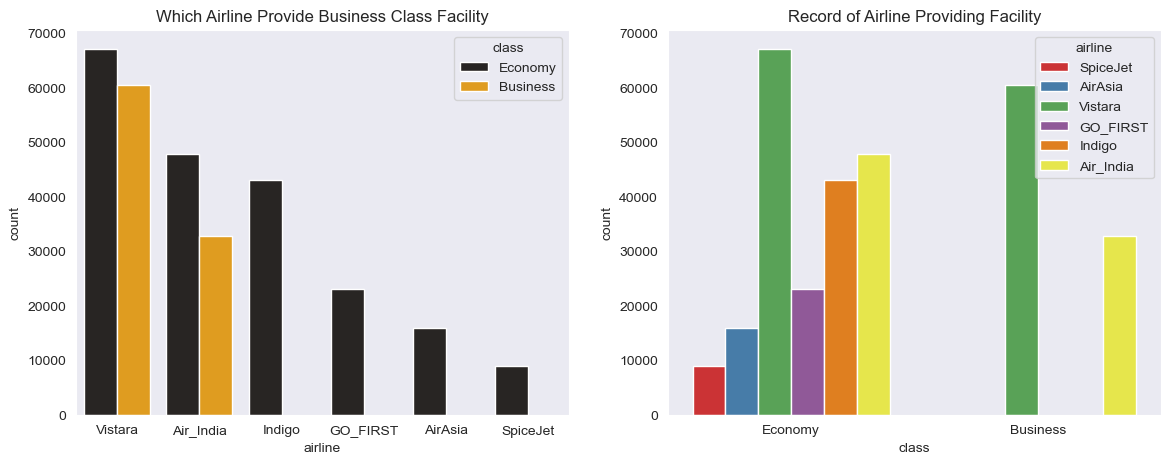

In [227]:
# There are mainly Two Airlines Providing Business Class Facility (Vistara and Air India)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=flight_2,x=flight_2['airline'],order=flight_2['airline'].value_counts().index,color='orange',hue=flight_2['class'])
plt.title('Which Airline Provide Business Class Facility')
plt.subplot(1,2,2)
sns.countplot(data=flight_2,x=flight_2['class'],hue=flight_2['airline'],palette='Set1')
plt.title('Record of Airline Providing Facility')
plt.show()

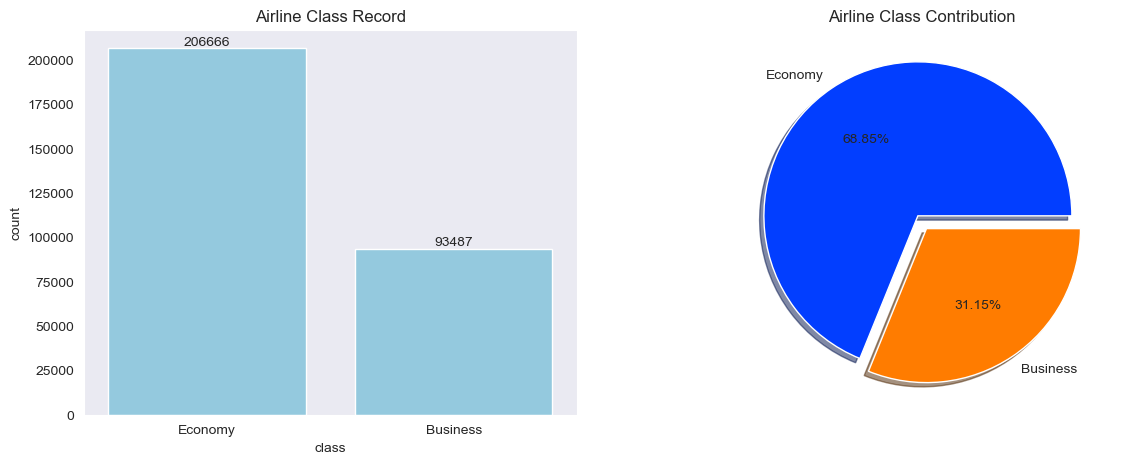

In [229]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=flight_2,x=flight_2['class'],color='skyblue')
for i,cls in enumerate(flight_2['class'].value_counts()):
    plt.text(i,cls,s=cls,ha='center',va='bottom')

plt.title('Airline Class Record')
plt.subplot(1,2,2)
plt.pie(x=flight_2['class'].value_counts(),explode=len(flight_2['class'].value_counts())*[0.05],autopct='%1.2f%%',labels=flight_2['class'].value_counts().index,colors=sns.color_palette('bright'),shadow=True)
plt.title('Airline Class Contribution')
plt.show()

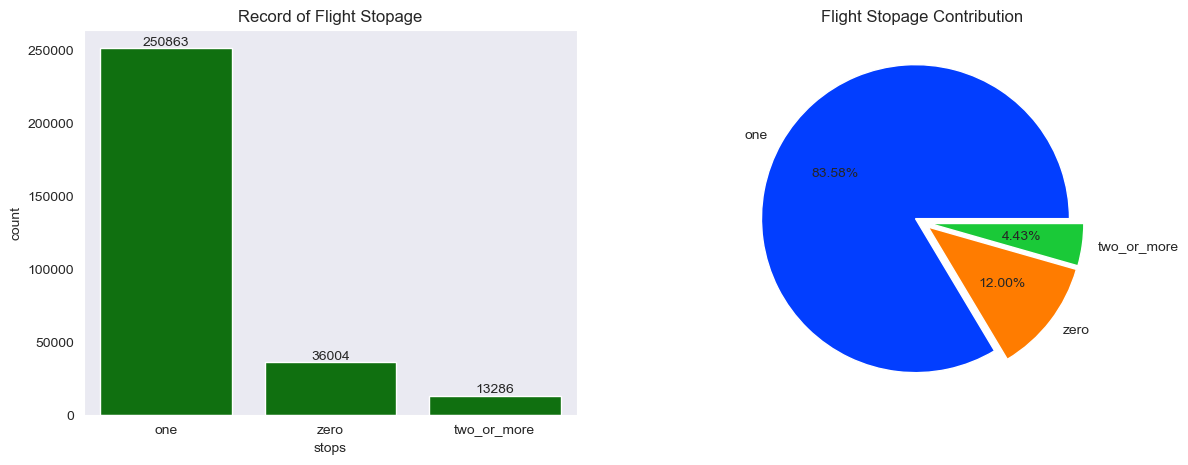

In [231]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=flight_2,x=flight_2['stops'],order=flight_2['stops'].value_counts().index,color='green')
for i,j in enumerate(flight_2['stops'].value_counts()):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('Record of Flight Stopage')
plt.subplot(1,2,2)
plt.pie(x=flight_2['stops'].value_counts(),explode=len(flight_2['stops'].value_counts())*[0.05],autopct='%1.2f%%',colors=sns.color_palette('bright'),labels=flight_2['stops'].value_counts().index)
plt.title('Flight Stopage Contribution')
plt.show()

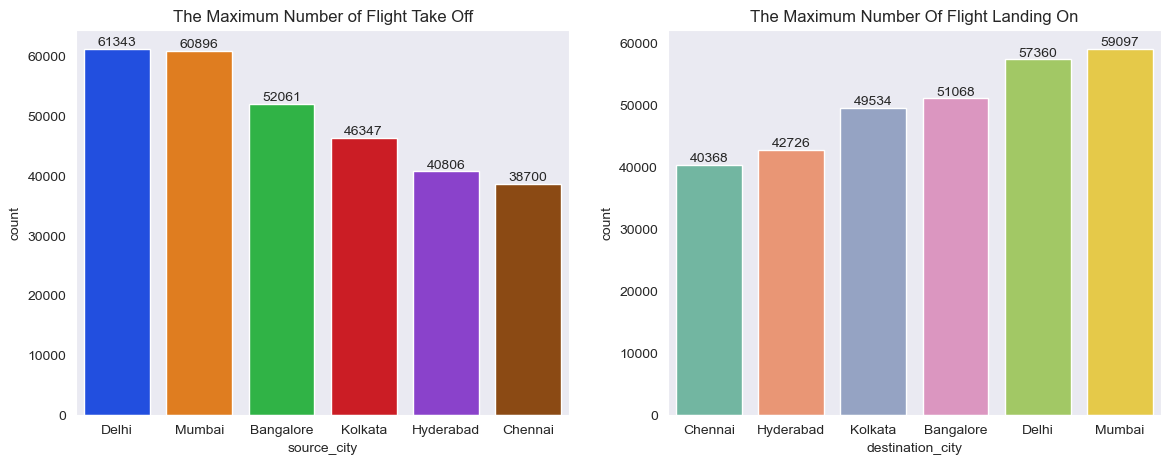

In [233]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=flight_2,x=flight_2['source_city'],palette='bright')
for i,j in enumerate(flight_2['source_city'].value_counts()):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('The Maximum Number of Flight Take Off')
plt.subplot(1,2,2)
sns.countplot(data=flight_2,x=flight_2['destination_city'],order=flight_2['destination_city'].value_counts(ascending=True).index,palette='Set2')
for i,j in enumerate(flight_2['destination_city'].value_counts(ascending=True)):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('The Maximum Number Of Flight Landing On')
plt.show()

# The Maximum Number of Flight Running in Between Delhi to Mumbai

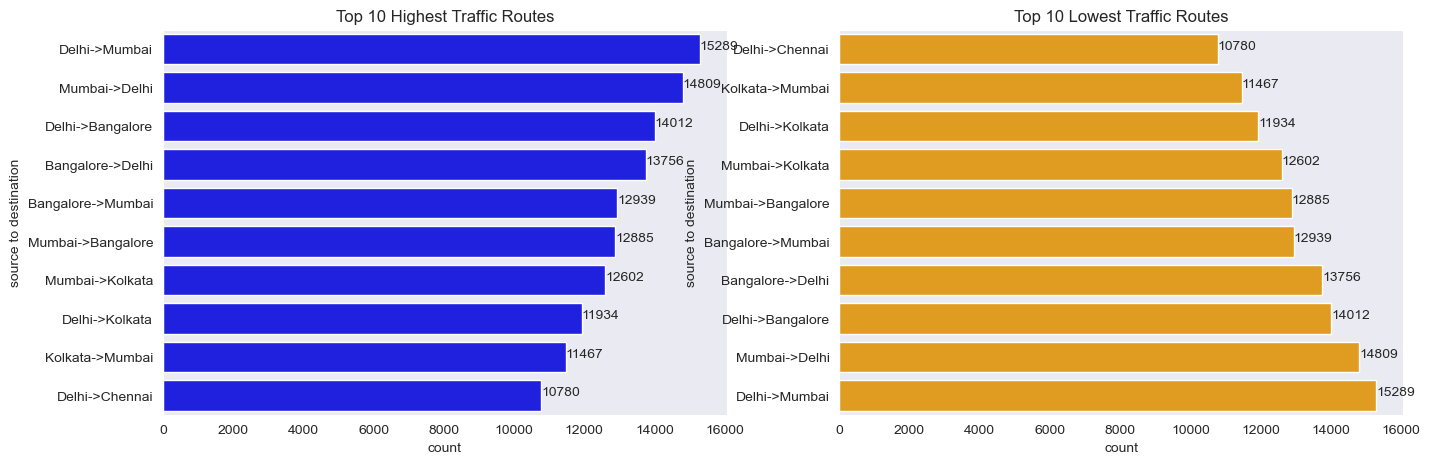

In [235]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(data=flight_2,y=flight_2['source to destination'],order=flight_2['source to destination'].value_counts().head(10).index,color='blue')
for i,j in enumerate(flight_2['source to destination'].value_counts().head(10)):
    plt.text(j,i,s=j)

plt.title('Top 10 Highest Traffic Routes')
plt.subplot(1,2,2)
sns.countplot(data=flight_2,y=flight_2['source to destination'],order=flight_2['source to destination'].value_counts(ascending=True).tail(10).index,color='orange')
for i,j in enumerate(flight_2['source to destination'].value_counts(ascending=True).tail(10)):
    plt.text(j,i,s=j)

plt.title('Top 10 Lowest Traffic Routes')
plt.show()

### airline_agg New Data Frame

In [237]:
airline_agg = flight_2.groupby(by='airline').agg({'flight':'count','duration':'mean','price':'mean'}).reset_index()

In [241]:
airline_agg['duration'] = airline_agg['duration'].round(2)

In [243]:
airline_agg['price'] = airline_agg['price'].round(2)

In [245]:
airline_agg

,airline,flight,duration,price
0,AirAsia,16098,8.94,4091.07
1,Air_India,80892,15.50,23507.02
2,GO_FIRST,23173,8.76,5652.01
3,Indigo,43120,5.80,5324.22
4,SpiceJet,9011,12.58,6179.28
5,Vistara,127859,13.33,30396.54


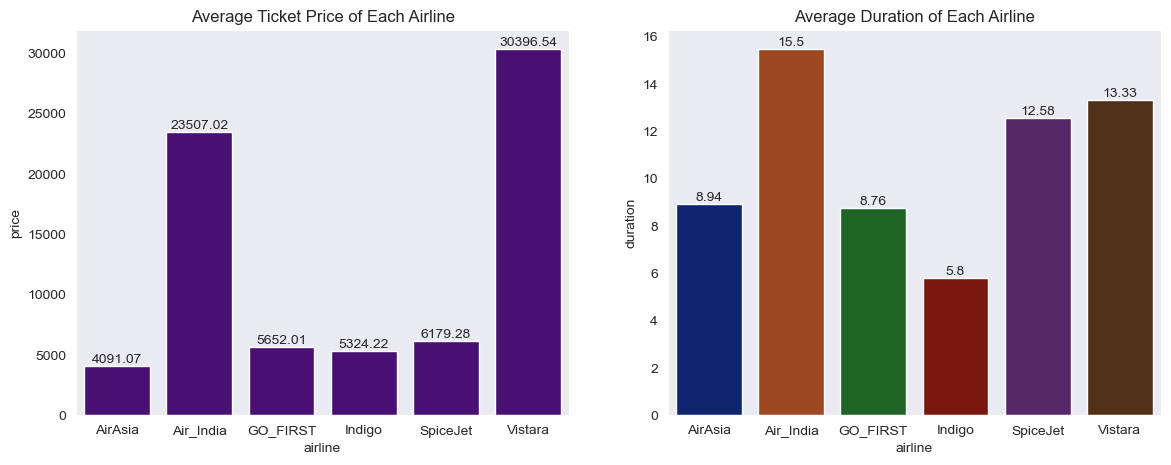

In [247]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(data=airline_agg,x=airline_agg['airline'],y=airline_agg['price'],color='indigo')
for i,j in enumerate(airline_agg['price']):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('Average Ticket Price of Each Airline')
plt.subplot(1,2,2)
sns.barplot(data=airline_agg,x=airline_agg['airline'],y=airline_agg['duration'],palette='dark')
for i,j in enumerate(airline_agg['duration']):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('Average Duration of Each Airline')
plt.show()

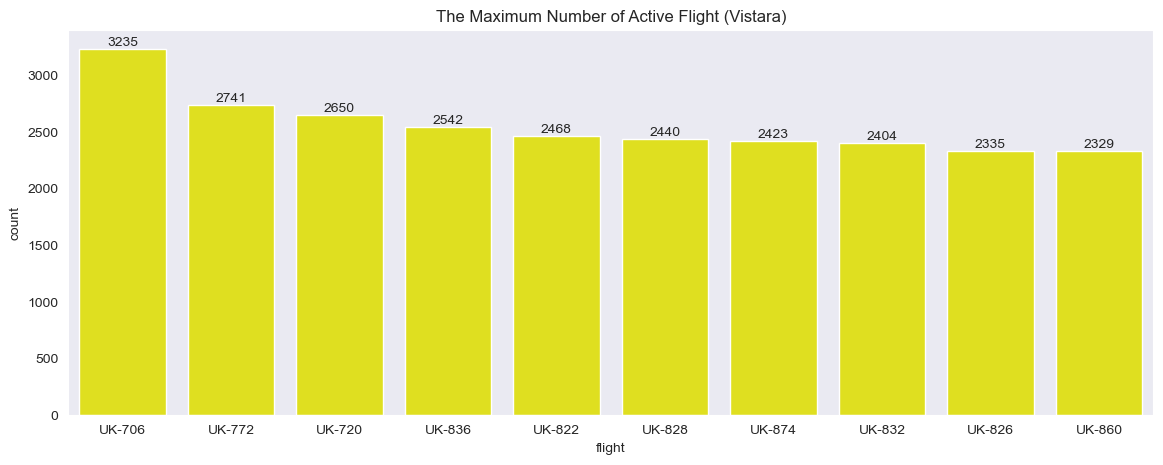

In [249]:
plt.figure(figsize=(14,5))
sns.countplot(data=flight_2,x=flight_2['flight'],order=flight_2['flight'].value_counts().head(10).index,color='yellow')
for i,j in enumerate(flight_2['flight'].value_counts().head(10)):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('The Maximum Number of Active Flight (Vistara)')
plt.show()

### Distrubution Plot

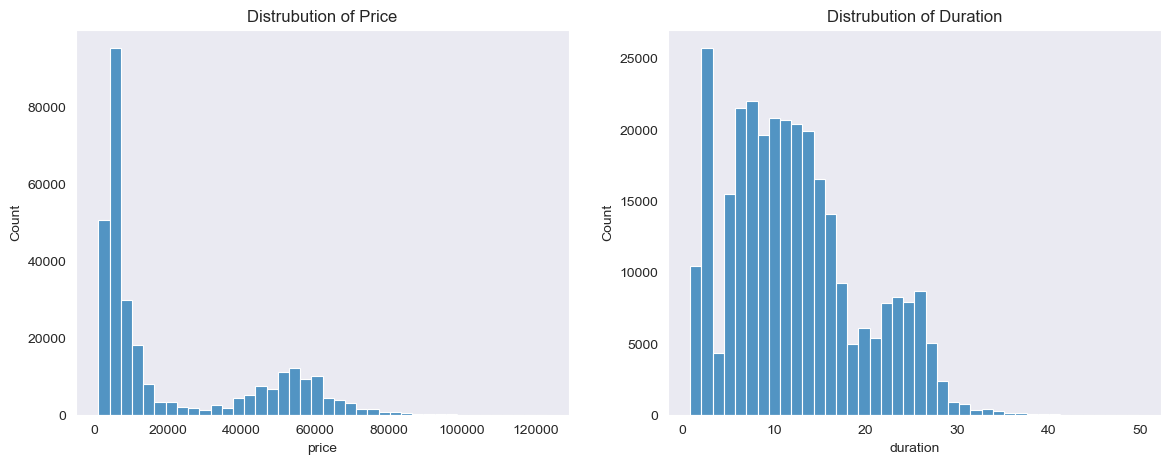

In [251]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=flight_2,x=flight_2['price'],bins=40)
plt.title('Distrubution of Price')
plt.subplot(1,2,2)
sns.histplot(data=flight_2,x=flight_2['duration'],bins=40)
plt.title('Distrubution of Duration')
plt.show()

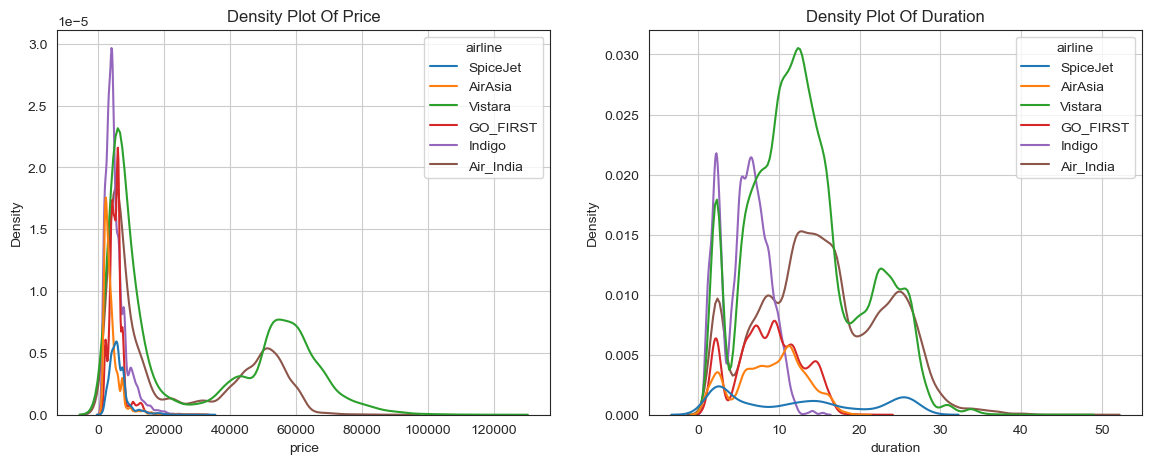

In [253]:
sns.set_style('white')
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.kdeplot(data=flight_2,x=flight_2['price'],hue=flight_2['airline'])
plt.grid()
plt.title('Density Plot Of Price')
plt.subplot(1,2,2)
sns.kdeplot(data=flight_2,x=flight_2['duration'],hue=flight_2['airline'])
plt.grid()
plt.title('Density Plot Of Duration')
plt.show()

### New Data Frame (flight_3)

In [255]:
flight_3 = flight_2.copy()

In [257]:
flight_3.head()

,airline,flight,source_city,departure_time,stops,arrival_time,departure to arrival,destination_city,source to destination,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Evening->Night,Mumbai,Delhi->Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Early_Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Early_Morning->Early_Morning,Mumbai,Delhi->Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Morning->Afternoon,Mumbai,Delhi->Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.33,1,5955


### Top 3 Airline Analysis (Vistara, Air India and Indigo)

In [259]:
vistara_df = flight_3[flight_3['airline'] == 'Vistara']

In [261]:
airindia_df = flight_3[flight_3['airline'] == 'Air_India']

In [263]:
indigo_df = flight_3[flight_3['airline'] == 'Indigo']

### Vistara  and Air India Airline Analysis

In [265]:
vistara_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,departure to arrival,destination_city,source to destination,class,duration,days_left,price
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Morning->Afternoon,Mumbai,Delhi->Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Morning->Afternoon,Mumbai,Delhi->Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Afternoon->Evening,Mumbai,Delhi->Mumbai,Economy,2.17,1,6060


In [267]:
airindia_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,departure to arrival,destination_city,source to destination,class,duration,days_left,price
16,Air_India,AI-887,Delhi,Early_Morning,zero,Morning,Early_Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.08,1,5955
17,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Early_Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.17,1,5955
23,Air_India,AI-441,Delhi,Evening,one,Night,Evening->Night,Mumbai,Delhi->Mumbai,Economy,3.75,1,5955
37,Air_India,AI-453,Delhi,Early_Morning,one,Afternoon,Early_Morning->Afternoon,Mumbai,Delhi->Mumbai,Economy,8.83,1,11900
40,Air_India,AI-504,Delhi,Night,one,Morning,Night->Morning,Mumbai,Delhi->Mumbai,Economy,11.00,1,12150


In [269]:
sns.set_style('dark')

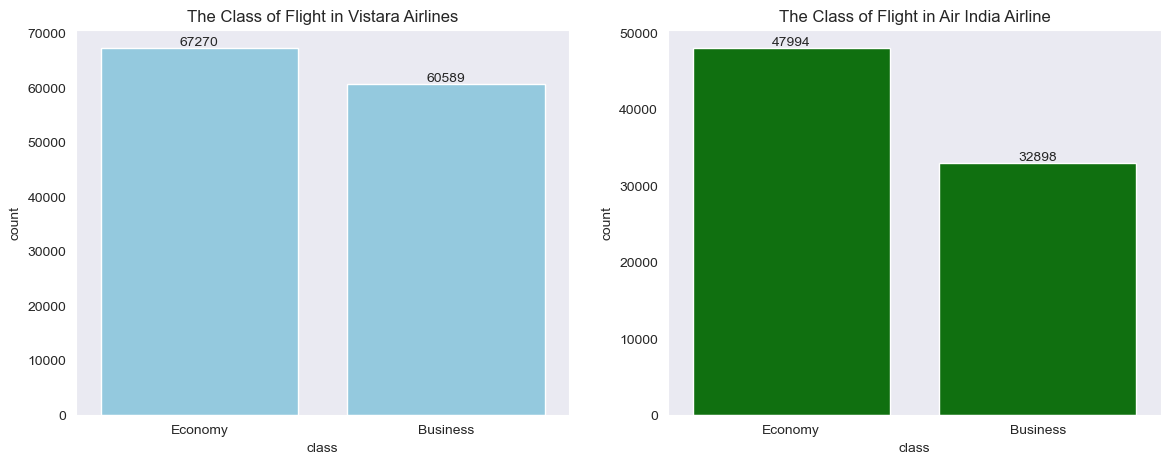

In [271]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=vistara_df,x=vistara_df['class'],color='skyblue')
for i,j in enumerate(vistara_df['class'].value_counts()):
    plt.text(i,j,s=j,ha='center',va='bottom')
plt.title('The Class of Flight in Vistara Airlines')
plt.subplot(1,2,2)
sns.countplot(data=airindia_df,x=airindia_df['class'],color='green')
for i,j in enumerate(airindia_df['class'].value_counts()):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('The Class of Flight in Air India Airline')
plt.show()

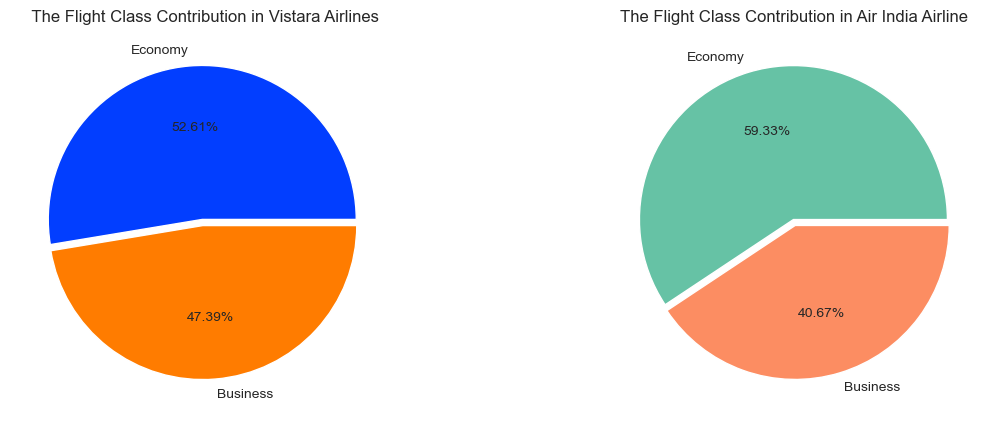

In [273]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(x=vistara_df['class'].value_counts(),explode=len(vistara_df['class'].value_counts())*[0.02],colors=sns.color_palette('bright'),autopct='%1.2f%%',labels=vistara_df['class'].value_counts().index)
plt.title(' The Flight Class Contribution in Vistara Airlines')
plt.subplot(1,2,2)
plt.pie(x=airindia_df['class'].value_counts(),explode=len(airindia_df['class'].value_counts())*[0.02],colors=sns.color_palette('Set2'),autopct='%1.2f%%',labels=airindia_df['class'].value_counts().index)
plt.title('The Flight Class Contribution in Air India Airline')
plt.show()

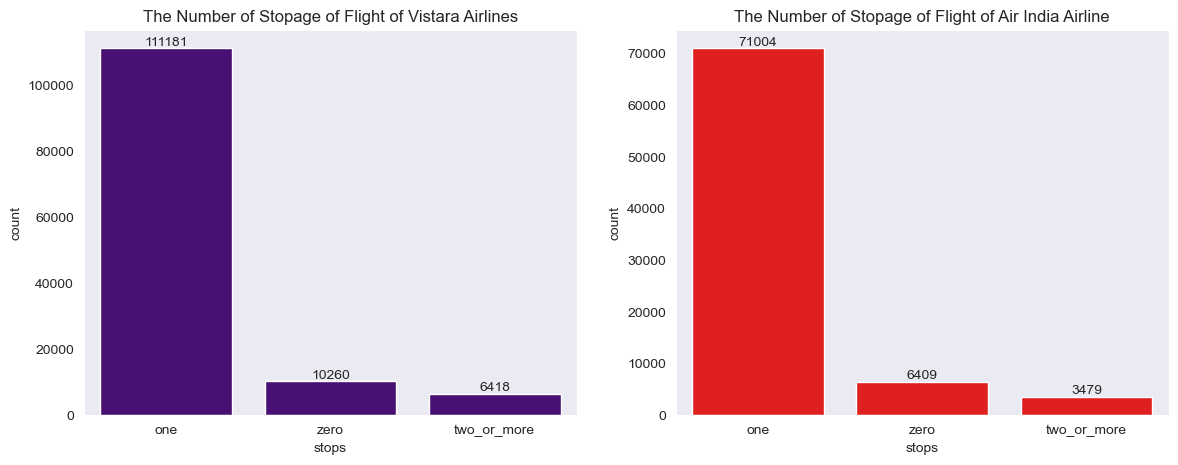

In [275]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=vistara_df,x=vistara_df['stops'],order=vistara_df['stops'].value_counts().index,color='indigo')
for i,j in enumerate(vistara_df['stops'].value_counts()):
    plt.text(i,j,s=j,va='bottom',ha='center')

plt.title('The Number of Stopage of Flight of Vistara Airlines')
plt.subplot(1,2,2)
sns.countplot(data=airindia_df,x=airindia_df['stops'],order=airindia_df['stops'].value_counts().index,color='red')
for i,j in enumerate(airindia_df['stops'].value_counts()):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('The Number of Stopage of Flight of Air India Airline')
plt.show()

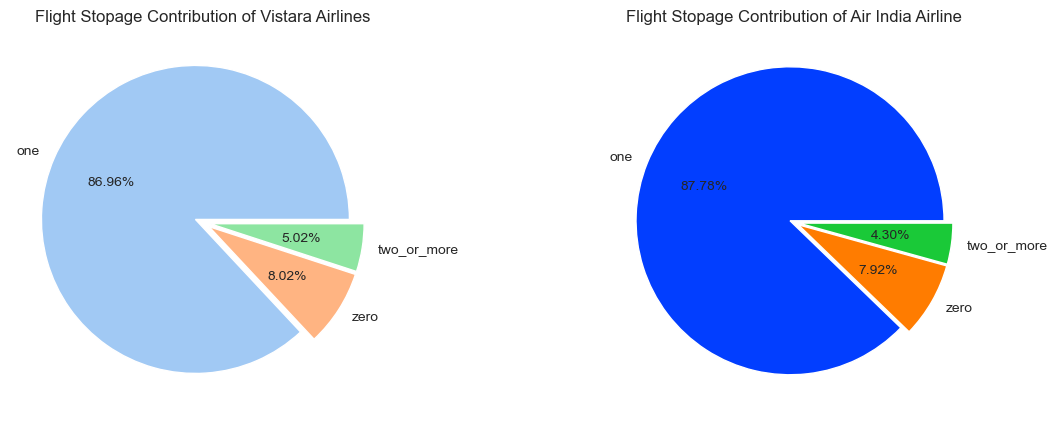

In [277]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(x=vistara_df['stops'].value_counts(),explode=len(vistara_df['stops'].value_counts())*[0.05],colors=sns.color_palette('pastel'),autopct='%1.2f%%',labels=vistara_df['stops'].value_counts().index)
plt.title('Flight Stopage Contribution of Vistara Airlines')
plt.subplot(1,2,2)
plt.pie(x=airindia_df['stops'].value_counts(),explode=len(airindia_df['stops'].value_counts())*[0.03],colors=sns.color_palette('bright'),autopct='%1.2f%%',labels=airindia_df['stops'].value_counts().index)
plt.title('Flight Stopage Contribution of Air India Airline')
plt.show()

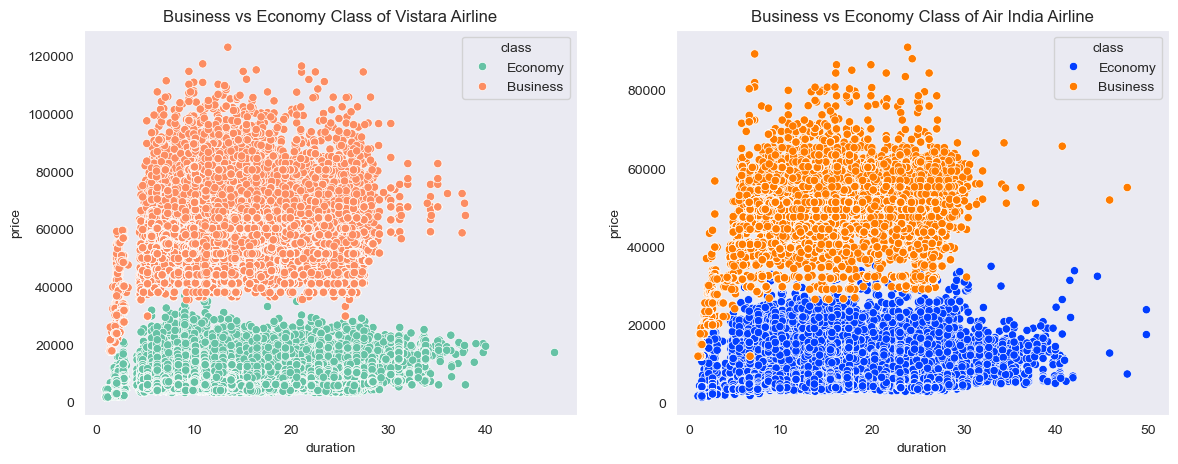

In [279]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=vistara_df,x=vistara_df['duration'],y=vistara_df['price'],hue=vistara_df['class'],palette='Set2')
plt.title('Business vs Economy Class of Vistara Airline')
plt.subplot(1,2,2)
sns.scatterplot(data=airindia_df,x=airindia_df['duration'],y=airindia_df['price'],hue=airindia_df['class'],palette='bright')
plt.title('Business vs Economy Class of Air India Airline')
plt.show()

### New Data Frame (vistara_flight_agg)

In [281]:
vistara_flight_agg = vistara_df.groupby(by=['class','flight']).agg({'departure to arrival':'count','duration':'mean','price':'mean'}).reset_index()

In [283]:
vistara_flight_agg['duration'] = vistara_flight_agg['duration'].round(2)

In [285]:
vistara_flight_agg['price'] = vistara_flight_agg['price'].round(2)

In [287]:
vistara_flight_agg.head()

,class,flight,departure to arrival,duration,price
0,Business,UK-613,111,6.70,57692.00
1,Business,UK-621,59,26.08,47245.81
2,Business,UK-627,45,26.67,40139.84
3,Business,UK-637,153,16.01,42700.37
4,Business,UK-641,3,11.36,37529.00


### New Data Frame (airindia_flight_agg)

In [289]:
airindia_flight_agg = airindia_df.groupby(by=['class','flight']).agg({'source to destination':'count','duration':'mean','price':'mean'}).reset_index()

In [291]:
airindia_flight_agg['duration'] = airindia_flight_agg['duration'].round(2)

In [293]:
airindia_flight_agg['price'] = airindia_flight_agg['price'].round(2)

In [295]:
airindia_flight_agg.head()

,class,flight,source to destination,duration,price
0,Business,AI-401,255,11.62,48058.40
1,Business,AI-402,731,13.23,52583.32
2,Business,AI-403,36,10.97,37054.64
3,Business,AI-406,48,5.25,44118.33
4,Business,AI-407,11,16.93,36924.09


### Indigo Airline Analysis

In [297]:
indigo_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,departure to arrival,destination_city,source to destination,class,duration,days_left,price
12,Indigo,6E-5001,Delhi,Early_Morning,zero,Morning,Early_Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.17,1,5955
13,Indigo,6E-6202,Delhi,Morning,zero,Afternoon,Morning->Afternoon,Mumbai,Delhi->Mumbai,Economy,2.17,1,5955
14,Indigo,6E-549,Delhi,Afternoon,zero,Evening,Afternoon->Evening,Mumbai,Delhi->Mumbai,Economy,2.25,1,5955
15,Indigo,6E-6278,Delhi,Morning,zero,Morning,Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.33,1,5955
24,Indigo,6E-5328,Delhi,Morning,zero,Morning,Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.50,1,6165


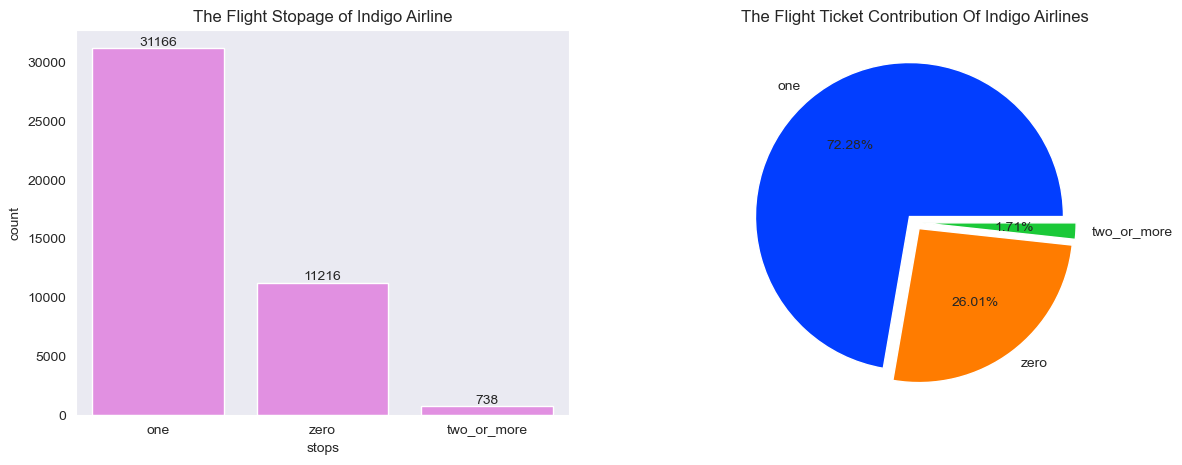

In [299]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=indigo_df,x=indigo_df['stops'],color='violet',order=indigo_df['stops'].value_counts().index)
for i,j in enumerate(indigo_df['stops'].value_counts()):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('The Flight Stopage of Indigo Airline')
plt.subplot(1,2,2)
plt.pie(x=indigo_df['stops'].value_counts(),explode=len(indigo_df['stops'].value_counts())*[0.05],colors=sns.color_palette('bright'),autopct='%1.2f%%',labels=indigo_df['stops'].value_counts().index)
plt.title('The Flight Ticket Contribution Of Indigo Airlines')
plt.show()

### Data Preprocessing

In [301]:
flight_3.head()

,airline,flight,source_city,departure_time,stops,arrival_time,departure to arrival,destination_city,source to destination,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Evening->Night,Mumbai,Delhi->Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Early_Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Early_Morning->Early_Morning,Mumbai,Delhi->Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Morning->Afternoon,Mumbai,Delhi->Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Morning->Morning,Mumbai,Delhi->Mumbai,Economy,2.33,1,5955


### New Data Frame (flight_stop) Analysis of One Stopage Flight

In [303]:
flight_3['stops'].replace({'zero':0,'one':1,'two_or_more':2},inplace=True)

In [305]:
flight_stop = flight_3[flight_3['stops'] == 1]

In [307]:
flight_stop.head()

,airline,flight,source_city,departure_time,stops,arrival_time,departure to arrival,destination_city,source to destination,class,duration,days_left,price
18,AirAsia,I5-747,Delhi,Evening,1,Early_Morning,Evening->Early_Morning,Mumbai,Delhi->Mumbai,Economy,12.25,1,5949
19,AirAsia,I5-747,Delhi,Evening,1,Morning,Evening->Morning,Mumbai,Delhi->Mumbai,Economy,16.33,1,5949
20,GO_FIRST,G8-266,Delhi,Early_Morning,1,Evening,Early_Morning->Evening,Mumbai,Delhi->Mumbai,Economy,11.75,1,5954
21,GO_FIRST,G8-101,Delhi,Early_Morning,1,Night,Early_Morning->Night,Mumbai,Delhi->Mumbai,Economy,14.50,1,5954
22,GO_FIRST,G8-103,Delhi,Evening,1,Morning,Evening->Morning,Mumbai,Delhi->Mumbai,Economy,15.67,1,5954


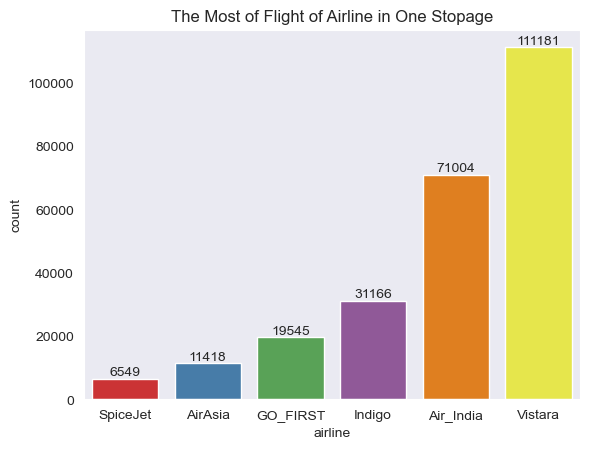

In [309]:
sns.countplot(data=flight_stop,x=flight_stop['airline'],order=flight_stop['airline'].value_counts(ascending=True).index,palette='Set1')
for i,j in enumerate(flight_stop['airline'].value_counts(ascending=True)):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('The Most of Flight of Airline in One Stopage')
plt.show()

We will do Preprocessing the Data With Unique Numerical Values; (**Departure Time** & **Arrival Time**) <br>
Early_Morning = 0 <br>
Morning = 1 <br>
Afternoon = 2 <br>
Evening = 3 <br>
Night = 4 <br>
Late_Night = 5 <br>

In [312]:
flight_3['departure_time'].replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5},inplace=True)

In [314]:
flight_3['arrival_time'].replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5},inplace=True)

### New Data Frame (flight_city) To Identify City Wise Unique Number

In [316]:
flight_city = flight_3['source_city'].value_counts().reset_index().sort_values(by='source_city',ignore_index=True)

In [318]:
flight_city.drop(columns='count',inplace=True)

In [320]:
flight_city

,source_city
0,Bangalore
1,Chennai
2,Delhi
3,Hyderabad
4,Kolkata
5,Mumbai


### New Data Frame (flight_airline) To Identify Airline Wise Unique Number

In [322]:
flight_airline = flight_3['airline'].value_counts().reset_index().sort_values(by='airline',ignore_index=True)

In [324]:
flight_airline.drop(columns='count',inplace=True)

In [326]:
flight_airline

,airline
0,AirAsia
1,Air_India
2,GO_FIRST
3,Indigo
4,SpiceJet
5,Vistara


### Label Encoding

In [328]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [330]:
flight_3['source_city'] = le.fit_transform(flight_3['source_city'])

In [332]:
flight_3['destination_city'] = le.fit_transform(flight_3['destination_city'])

In [334]:
flight_3['airline'] = le.fit_transform(flight_3['airline'])

In [336]:
flight_3['class'] = le.fit_transform(flight_3['class'])

### New Data Frame (flight_4)

In [338]:
flight_4 = flight_3.copy()

In [340]:
flight_4.head()

,airline,flight,source_city,departure_time,stops,arrival_time,departure to arrival,destination_city,source to destination,class,duration,days_left,price
0,4,SG-8709,2,3,0,4,Evening->Night,5,Delhi->Mumbai,1,2.17,1,5953
1,4,SG-8157,2,0,0,1,Early_Morning->Morning,5,Delhi->Mumbai,1,2.33,1,5953
2,0,I5-764,2,0,0,0,Early_Morning->Early_Morning,5,Delhi->Mumbai,1,2.17,1,5956
3,5,UK-995,2,1,0,2,Morning->Afternoon,5,Delhi->Mumbai,1,2.25,1,5955
4,5,UK-963,2,1,0,1,Morning->Morning,5,Delhi->Mumbai,1,2.33,1,5955


### Building Correlation 

In [342]:
correlation = flight_4[['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left','price']]

In [344]:
correlation.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,3,0,4,5,1,2.17,1,5953
1,4,2,0,0,1,5,1,2.33,1,5953
2,0,2,0,0,0,5,1,2.17,1,5956
3,5,2,1,0,2,5,1,2.25,1,5955
4,5,2,1,0,1,5,1,2.33,1,5955


In [346]:
correlation = correlation.corr()

In [348]:
correlation

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,-0.028350,0.000766,0.006749,0.004427,-0.030172,-0.178862,-0.001651,-0.010678,0.243358
source_city,-0.028350,1.000000,0.027196,-0.000560,0.022107,-0.222935,0.000075,0.008619,-0.003568,0.004594
departure_time,0.000766,0.027196,1.000000,-0.068986,-0.079679,-0.008426,-0.030956,0.132773,-0.000222,0.020948
stops,0.006749,-0.000560,-0.068986,1.000000,0.046436,-0.017768,-0.001027,0.468059,-0.008540,0.119648
arrival_time,0.004427,0.022107,-0.079679,0.046436,1.000000,-0.025067,0.022473,-0.123949,-0.000700,-0.001019
destination_city,-0.030172,-0.222935,-0.008426,-0.017768,-0.025067,1.000000,0.001603,0.001736,-0.005323,0.004795
class,-0.178862,0.000075,-0.030956,-0.001027,0.022473,0.001603,1.000000,-0.138710,0.013039,-0.937860
duration,-0.001651,0.008619,0.132773,0.468059,-0.123949,0.001736,-0.138710,1.000000,-0.039157,0.204222
days_left,-0.010678,-0.003568,-0.000222,-0.008540,-0.000700,-0.005323,0.013039,-0.039157,1.000000,-0.091949
price,0.243358,0.004594,0.020948,0.119648,-0.001019,0.004795,-0.937860,0.204222,-0.091949,1.000000


### Plot Heat Map Graph

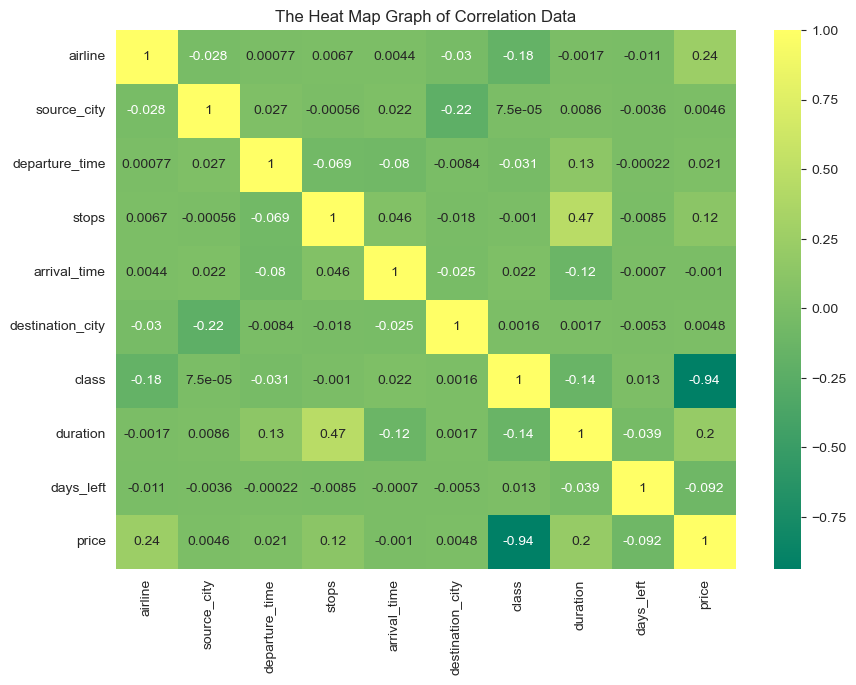

In [350]:
plt.figure(figsize=(10,7))
sns.heatmap(data=correlation,annot=True,cmap='summer')
plt.title('The Heat Map Graph of Correlation Data')
plt.show()

### Data Preprocessing

In [354]:
flight_4.drop(columns='flight',inplace=True)

In [356]:
flight_4.drop(columns='departure to arrival',inplace=True)

In [358]:
flight_4.drop(columns='source to destination',inplace=True)

In [360]:
flight_4.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,3,0,4,5,1,2.17,1,5953
1,4,2,0,0,1,5,1,2.33,1,5953
2,0,2,0,0,0,5,1,2.17,1,5956
3,5,2,1,0,2,5,1,2.25,1,5955
4,5,2,1,0,1,5,1,2.33,1,5955


# MODEL SELECTION

Model are Used,
1. **Linear Regression**
2. **Random Forest Regression**
3. **Decision Tree Regression**
4. **Gradient Boosting**
5. **Extreme Gradient Boosting (XGB)**
6. **KNN (K-Nearest Neighboars)**

### Defined Features & Target Variables

In [363]:
x = flight_4[['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']]

In [365]:
y = flight_4['price']

### Import Train-Test-Split Model

In [367]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=8956)

# Linear Regression Algorithms

In [369]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### Model Train & Fit

In [371]:
lr.fit(x_train,y_train)

LinearRegression()

### Model Intercept

In [373]:
lr.intercept_

44201.63478478398

### Model Coefficient

In [375]:
lr.coef_

array([   962.28418499,    119.64893232,    -48.87866064,   5942.08636246,
          305.39805341,    162.90507051, -45027.33991592,     88.46232315,
         -128.65362101])

### Model Predict

In [377]:
lr_y_pred = lr.predict(x_test)

In [379]:
lr_y_pred

array([ 7104.70284497, 49470.28355434,   386.8338016 , ...,
        3606.4036415 ,  4157.1512365 , 52372.19036526])

### Model Evaluation & Accuracy

In [381]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [383]:
mean_absolute_error(y_test,lr_y_pred)

4565.196288409253

In [385]:
mean_squared_error(y_test,lr_y_pred)

48711496.187283166

In [387]:
mean_absolute_percentage_error(y_test,lr_y_pred)

0.42348213619084757

The Accuracy Percentage of Predict in Linear Regression is **58%**

### Model Testing 

In [389]:
model_test = x_test.copy()

In [391]:
model_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
13754,3,2,1,1,3,0,1,6.42,20
257570,1,0,2,1,3,3,0,6.00,27
33334,4,2,3,0,4,3,1,2.17,36
23395,2,2,3,1,4,4,1,6.58,20
81995,5,5,1,1,4,1,1,8.33,35


In [393]:
model_test.insert(loc=9,column='Actual Price',value=y_test)

In [395]:
model_test.insert(loc=10,column='Linear Regression Predicted',value=lr_y_pred)

In [397]:
model_test['Linear Regression Predicted'] = model_test['Linear Regression Predicted'].round(0)

In [399]:
model_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,Actual Price,Linear Regression Predicted
13754,3,2,1,1,3,0,1,6.42,20,5702,7105.0
257570,1,0,2,1,3,3,0,6.00,27,56476,49470.0
33334,4,2,3,0,4,3,1,2.17,36,2100,387.0
23395,2,2,3,1,4,4,1,6.58,20,5954,7016.0
81995,5,5,1,1,4,1,1,8.33,35,4348,8096.0


# Random Forest Regression Algorithms

In [401]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

### Model Train & Fit

In [403]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

### Model Predict

In [405]:
rfr_y_pred = rfr.predict(x_test)

In [406]:
rfr_y_pred

array([ 5665.52      , 56476.        ,  2529.49333333, ...,
        7081.42      ,  4417.78333333, 38099.        ])

### Model Evaluation and Accuracy

In [409]:
mean_absolute_error(y_test,rfr_y_pred)

1077.2547028221927

In [411]:
mean_squared_error(y_test,rfr_y_pred)

7559337.01345167

In [413]:
mean_absolute_percentage_error(y_test,rfr_y_pred)

0.06943143710347144

The Accuracy of Predicted Value in Random Forest Regression is **94%**

### Model Testing

In [415]:
model_test.insert(loc=11,column='Random Forest Regression Predicted',value=rfr_y_pred)

In [417]:
model_test['Random Forest Regression Predicted'] = model_test['Random Forest Regression Predicted'].round()

In [419]:
model_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,Actual Price,Linear Regression Predicted,Random Forest Regression Predicted
13754,3,2,1,1,3,0,1,6.42,20,5702,7105.0,5666.0
257570,1,0,2,1,3,3,0,6.00,27,56476,49470.0,56476.0
33334,4,2,3,0,4,3,1,2.17,36,2100,387.0,2529.0
23395,2,2,3,1,4,4,1,6.58,20,5954,7016.0,5954.0
81995,5,5,1,1,4,1,1,8.33,35,4348,8096.0,4334.0


# Decision Tree Regression Algorithms

In [421]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr = DecisionTreeRegressor()

### Model Train & Fit

In [423]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

### Model Predict

In [425]:
dtr_y_pred = dtr.predict(x_test)

In [427]:
dtr_y_pred

array([ 5702., 56476.,  2100., ...,  7267.,  3819., 38099.])

### Model Evaluation & Accuracy

In [429]:
mean_absolute_error(y_test,dtr_y_pred)

1145.95151394002

In [431]:
mean_squared_error(y_test,dtr_y_pred)

11561019.937576698

In [433]:
mean_absolute_percentage_error(y_test,dtr_y_pred)

0.07300329793319281

The Accuracy of Predicted Price in Decision Tree Classification Model is **93%**

### Model Testing

In [437]:
model_test.insert(loc=12,column='Decision Tree Regression Predict',value=dtr_y_pred)

In [439]:
model_test['Decision Tree Regression Predict'] = model_test['Decision Tree Regression Predict'].round(0)

In [441]:
model_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,Actual Price,Linear Regression Predicted,Random Forest Regression Predicted,Decision Tree Regression Predict
13754,3,2,1,1,3,0,1,6.42,20,5702,7105.0,5666.0,5702.0
257570,1,0,2,1,3,3,0,6.00,27,56476,49470.0,56476.0,56476.0
33334,4,2,3,0,4,3,1,2.17,36,2100,387.0,2529.0,2100.0
23395,2,2,3,1,4,4,1,6.58,20,5954,7016.0,5954.0,5954.0
81995,5,5,1,1,4,1,1,8.33,35,4348,8096.0,4334.0,4348.0


# Gradient Boosting Algorithms

In [443]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

### Model Train & Fit

In [445]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

### Model Predict

In [447]:
gbr_y_pred = gbr.predict(x_test)

In [449]:
gbr_y_pred

array([ 4731.283711  , 47241.56797412,  2360.17146646, ...,
        4326.15411197,  4572.23034423, 54654.64641595])

### Model Evaluation & Accuracy

In [451]:
mean_absolute_error(y_test,gbr_y_pred)

2964.7411854849106

In [453]:
mean_squared_error(y_test,gbr_y_pred)

24886522.168777045

In [455]:
mean_absolute_percentage_error(y_test,gbr_y_pred)

0.20762080060170193

The Accuracy of Predict Price in Gradient Boostion Model is **80%**

### Model Testing

In [457]:
model_test.insert(loc=13,column='Gradient Boosting Predicted',value=gbr_y_pred)

In [459]:
model_test['Gradient Boosting Predicted'] = model_test['Gradient Boosting Predicted'].round()

In [461]:
model_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,Actual Price,Linear Regression Predicted,Random Forest Regression Predicted,Decision Tree Regression Predict,Gradient Boosting Predicted
13754,3,2,1,1,3,0,1,6.42,20,5702,7105.0,5666.0,5702.0,4731.0
257570,1,0,2,1,3,3,0,6.00,27,56476,49470.0,56476.0,56476.0,47242.0
33334,4,2,3,0,4,3,1,2.17,36,2100,387.0,2529.0,2100.0,2360.0
23395,2,2,3,1,4,4,1,6.58,20,5954,7016.0,5954.0,5954.0,5118.0
81995,5,5,1,1,4,1,1,8.33,35,4348,8096.0,4334.0,4348.0,6783.0


# Extreme Gradient Boosting Algorithms

In [463]:
import xgboost

In [465]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

### Model Train & Fit

In [467]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Model Predict

In [469]:
xgb_y_pred = xgb.predict(x_test)

In [471]:
xgb_y_pred

array([ 5041.2153, 53634.605 ,  2484.955 , ...,  5889.4824,  5147.5435,
       43500.77  ], dtype=float32)

### Model Evaluation & Accuracy

In [473]:
mean_absolute_error(y_test,xgb_y_pred)

2040.9091686621093

In [475]:
mean_squared_error(y_test,xgb_y_pred)

12742717.992104558

In [477]:
mean_absolute_percentage_error(y_test,xgb_y_pred)

0.14771389718790184

The Accuracy of Predicted Price in Extreme Gradient Boosting Model is **86%**

### Model Testing

In [479]:
model_test.insert(loc=14,column='XGB Predicted',value=xgb_y_pred)

In [481]:
model_test['XGB Predicted'] = model_test['XGB Predicted'].round()

In [483]:
model_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,Actual Price,Linear Regression Predicted,Random Forest Regression Predicted,Decision Tree Regression Predict,Gradient Boosting Predicted,XGB Predicted
13754,3,2,1,1,3,0,1,6.42,20,5702,7105.0,5666.0,5702.0,4731.0,5041.0
257570,1,0,2,1,3,3,0,6.00,27,56476,49470.0,56476.0,56476.0,47242.0,53635.0
33334,4,2,3,0,4,3,1,2.17,36,2100,387.0,2529.0,2100.0,2360.0,2485.0
23395,2,2,3,1,4,4,1,6.58,20,5954,7016.0,5954.0,5954.0,5118.0,5719.0
81995,5,5,1,1,4,1,1,8.33,35,4348,8096.0,4334.0,4348.0,6783.0,5288.0


# K-Nearest Neighbour (KNN) Algorithms

In [485]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

### Model Train & Fit

In [487]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

### Model Predict

In [489]:
knn_y_pred = knn.predict(x_test)

In [491]:
knn_y_pred

array([ 5067. , 27776.8,  3178.4, ...,  5273. ,  6868.2, 39071.6])

### Model Evaluation & Accuracy

In [493]:
mean_absolute_error(y_test,knn_y_pred)

7830.072912328629

In [495]:
mean_squared_error(y_test,knn_y_pred)

128956590.22815877

In [497]:
mean_absolute_percentage_error(y_test,knn_y_pred)

0.7176791898973174

The Accuracy of Predicted Price in KNN Regression Model is **29%**

### Model Testing

In [499]:
model_test.insert(loc=15,column='KNN Regression Predict',value=knn_y_pred)

In [501]:
model_test['KNN Regression Predict'] = model_test['KNN Regression Predict'].round()

In [503]:
model_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,Actual Price,Linear Regression Predicted,Random Forest Regression Predicted,Decision Tree Regression Predict,Gradient Boosting Predicted,XGB Predicted,KNN Regression Predict
13754,3,2,1,1,3,0,1,6.42,20,5702,7105.0,5666.0,5702.0,4731.0,5041.0,5067.0
257570,1,0,2,1,3,3,0,6.00,27,56476,49470.0,56476.0,56476.0,47242.0,53635.0,27777.0
33334,4,2,3,0,4,3,1,2.17,36,2100,387.0,2529.0,2100.0,2360.0,2485.0,3178.0
23395,2,2,3,1,4,4,1,6.58,20,5954,7016.0,5954.0,5954.0,5118.0,5719.0,5416.0
81995,5,5,1,1,4,1,1,8.33,35,4348,8096.0,4334.0,4348.0,6783.0,5288.0,16266.0


# MODEL EVALUATION & ACCURACY

Model evaluation and accuracy assessment involve using a variety of metrics to quantify the model's performance,and continuously monitoring and improving the model. By rigorously evaluating the model, we can ensure it provides accurate and reliable predictions that meet the needs of consumers, airlines, and travel agencies.

In [505]:
model_report = pd.DataFrame(data=[[42,58],[7,93],[7,93],[21,79],[15,85],[72,28]],index=['Linear Regression','Random Forest Regression','Decision Tree Regression','Gradient Boosting','XGB Regression','KNN Regression'],columns=['Mean Absolute Percentage Error in %','Accuracy of Predict in %'])

In [507]:
model_report

,Mean Absolute Percentage Error in %,Accuracy of Predict in %
Linear Regression,42,58
Random Forest Regression,7,93
Decision Tree Regression,7,93
Gradient Boosting,21,79
XGB Regression,15,85
KNN Regression,72,28


### New Data Frame (model_report_2)

In [509]:
model_report_2 =  model_report.reset_index()

In [511]:
model_report_2

,index,Mean Absolute Percentage Error in %,Accuracy of Predict in %
0,Linear Regression,42,58
1,Random Forest Regression,7,93
2,Decision Tree Regression,7,93
3,Gradient Boosting,21,79
4,XGB Regression,15,85
5,KNN Regression,72,28


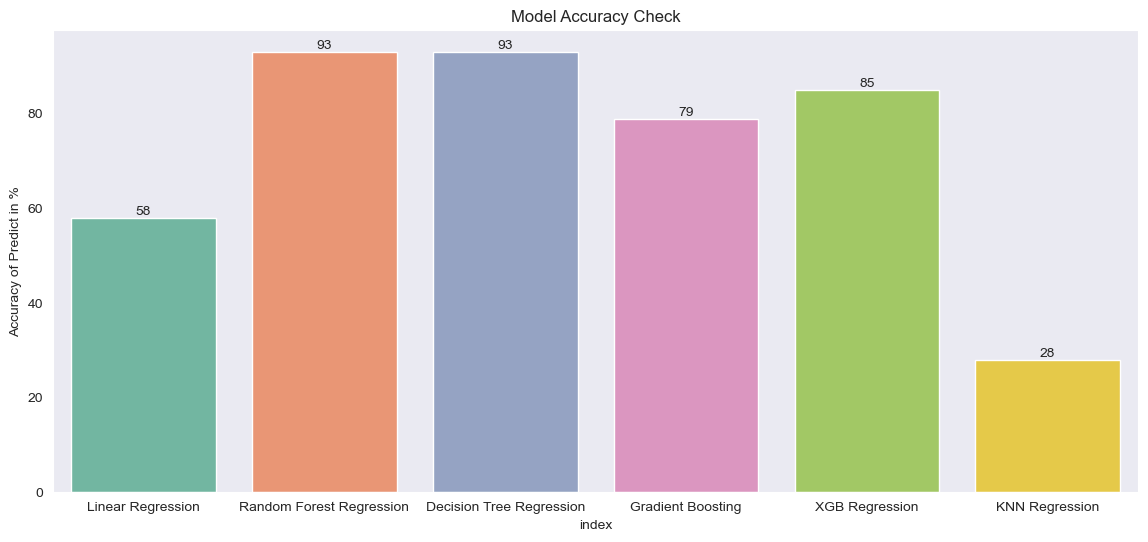

In [513]:
plt.figure(figsize=(14,6))
sns.barplot(data=model_report_2,x=model_report_2['index'],y=model_report_2['Accuracy of Predict in %'],palette='Set2')
for i,j in enumerate(model_report_2['Accuracy of Predict in %']):
    plt.text(i,j,s=j,ha='center',va='bottom')

plt.title('Model Accuracy Check')
plt.show()

The Best Fit Model for this Poject is **Decision Tree Classification** and **Random Forest Classification** with The Accuracy of **93%**.

# THANK YOU